# SPRINT 2

#### PNT2022TMID27693

In [1]:
import numpy as np
import tensorflow
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.models import Sequential 
from tensorflow.keras import layers 
from tensorflow.keras.layers import Dense, Flatten 
from tensorflow.keras.layers import Conv2D 
from keras.optimizers import Adam 
from keras. utils import np_utils
import matplotlib.pyplot as plt   

In [2]:
(x_train, y_train), (x_test, y_test)=mnist.load_data ()
x_train=x_train.reshape (60000, 28, 28, 1).astype('float32')
x_test=x_test.reshape (10000, 28, 28, 1).astype ('float32')
number_of_classes = 10  
y_train = np_utils.to_categorical (y_train, number_of_classes) 
y_test = np_utils.to_categorical (y_test, number_of_classes)

## Add CNN Layer

In [3]:
model=Sequential ()

In [4]:
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))

In [5]:
model.add(Flatten())

In [6]:
model.add(Dense(number_of_classes,activation = 'softmax'))

## Compiling The Model

In [7]:
model.compile(loss= 'categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

In [8]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

## Train The Model

In [9]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 142s 75ms/step - loss: 0.1989 - accuracy: 0.9542 - val_loss: 0.0849 - val_accuracy: 0.9738
Epoch 2/5
1875/1875 [==============================] - 210s 112ms/step - loss: 0.0652 - accuracy: 0.9801 - val_loss: 0.0688 - val_accuracy: 0.9801
Epoch 3/5
1875/1875 [==============================] - 179s 95ms/step - loss: 0.0466 - accuracy: 0.9851 - val_loss: 0.0791 - val_accuracy: 0.9794
Epoch 4/5
1875/1875 [==============================] - 215s 115ms/step - loss: 0.0342 - accuracy: 0.9894 - val_loss: 0.0899 - val_accuracy: 0.9745
Epoch 5/5
1875/1875 [==============================] - 177s 95ms/step - loss: 0.0284 - accuracy: 0.9913 - val_loss: 0.0933 - val_accuracy: 0.9800


## Observing The Metrices

In [10]:
metrics = model.evaluate(x_test, y_test, verbose=0)
print("Metrics (Test loss &Test Accuracy) : ")
print(metrics)

Metrics (Test loss &Test Accuracy) : 
[0.09330402314662933, 0.9800000190734863]


In [11]:
prediction=model.predict(x_test[6000:6001])
print(prediction)

1/1 [==============================] - 0s 303ms/step
[[1.5700993e-12 4.1834502e-16 2.7402531e-12 9.3891288e-07 9.3042974e-07
  1.4103222e-08 3.3308633e-15 7.0691283e-05 7.0403892e-08 9.9992728e-01]]


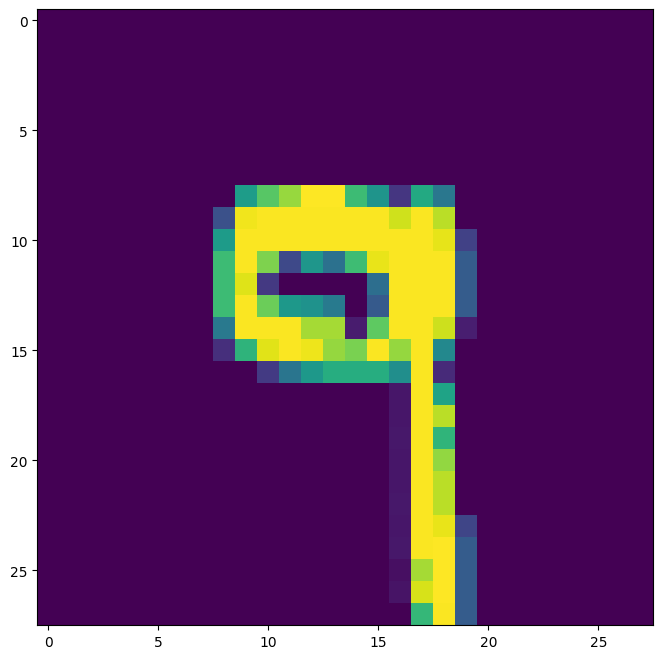

In [16]:
plt.figure(figsize=(10,8))
plt.imshow(x_test[6000])

In [13]:
print(np.argmax(prediction, axis=1))

[9]


## Save The Model

In [14]:
model.save('models/mnistCNN.h5')